<a href="https://colab.research.google.com/github/sabeesh90/EVA6_master/blob/main/Gradcam_Pytorch_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Navigation inside root directory

In [1]:
  !pip install albumentations==0.4.6

In [2]:
import torchvision

from IPython.display import clear_output
import shutil
import  os
import numpy as np
import matplotlib.pyplot as plt
import albumentations as A
import cv2
os.chdir('/content/')
shutil.rmtree('EVA6_master')
import warnings
warnings.filterwarnings('ignore')
import pickle
# os.chdir('/content/')

##### Cloning the repository

In [3]:
!git clone https://github.com/sabeesh90/EVA6_master.git


Cloning into 'EVA6_master'...
remote: Enumerating objects: 290, done.
remote: Counting objects: 100% (290/290), done.
remote: Compressing objects: 100% (284/284), done.
remote: Total 290 (delta 130), reused 3 (delta 0), pack-reused 0
Receiving objects: 100% (290/290), 550.78 KiB | 5.80 MiB/s, done.
Resolving deltas: 100% (130/130), done.


##### navgiating to models folder and loading requisite libraries

In [4]:

%cd EVA6_master/"main and utils"
import main2
from main2 import *
import models
from models import *
import resnet_cam
from resnet_cam import *
import show_cam_bharath_manu_dinesh_sab
from show_cam_bharath_manu_dinesh_sab import *
resnet = ResNet18()

/content/EVA6_master/main and utils


##### Generating train and test dataset

In [5]:
trainloader, testloader = generate_dataset()


Extracting /root/data/cifar10/cifar-10-python.tar.gz to /root/data/cifar10
Files already downloaded and verified


In [6]:
testloader.dataset.class_to_idx
class_dictionary = {}
for key,value in testloader.dataset.class_to_idx.items():
    class_dictionary[value] = key
class_dictionary

{0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck'}

##### Loading the resnet model

In [7]:
my_model = generate_model(resnet)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
         GroupNorm-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
         GroupNorm-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
         GroupNorm-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
        GroupNorm-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
        GroupNorm-14          [-1, 128,

##### Importing training algorithms

In [8]:
import train_test
from train_test import *
optimizer, scheduler =  create_optim(my_model,trainloader)

##### Training the model

In [9]:
epochs = 40
device = 'cuda'
for epoch in range(epochs):
    print("EPOCH:", epoch)
    train(my_model,trainloader, optimizer,device,scheduler)
    test(my_model, testloader,device)


  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 0
391


Loss=1.9552676677703857 Batch_id=390 Accuracy=18.74: 100%|██████████| 391/391 [00:30<00:00, 13.03it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.8713, Accuracy: 3043/10000 (30.43%)

EPOCH: 1
391


Loss=1.7569007873535156 Batch_id=390 Accuracy=33.43: 100%|██████████| 391/391 [00:29<00:00, 13.06it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.6900, Accuracy: 3856/10000 (38.56%)

EPOCH: 2
391


Loss=1.4216015338897705 Batch_id=390 Accuracy=43.64: 100%|██████████| 391/391 [00:30<00:00, 13.02it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.3033, Accuracy: 5227/10000 (52.27%)

EPOCH: 3
391


Loss=1.23317551612854 Batch_id=390 Accuracy=49.41: 100%|██████████| 391/391 [00:30<00:00, 12.94it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.2668, Accuracy: 5373/10000 (53.73%)

EPOCH: 4
391


Loss=1.1698572635650635 Batch_id=390 Accuracy=55.62: 100%|██████████| 391/391 [00:30<00:00, 12.94it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.2382, Accuracy: 5507/10000 (55.07%)

EPOCH: 5
391


Loss=1.1209052801132202 Batch_id=390 Accuracy=60.92: 100%|██████████| 391/391 [00:30<00:00, 12.94it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.9582, Accuracy: 6562/10000 (65.62%)

EPOCH: 6
391


Loss=0.9396487474441528 Batch_id=390 Accuracy=64.91: 100%|██████████| 391/391 [00:30<00:00, 12.94it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.9047, Accuracy: 6787/10000 (67.87%)

EPOCH: 7
391


Loss=1.0339268445968628 Batch_id=390 Accuracy=67.85: 100%|██████████| 391/391 [00:30<00:00, 12.94it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.9698, Accuracy: 6570/10000 (65.70%)

EPOCH: 8
391


Loss=0.9934279322624207 Batch_id=390 Accuracy=71.08: 100%|██████████| 391/391 [00:30<00:00, 12.93it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7860, Accuracy: 7267/10000 (72.67%)

EPOCH: 9
391


Loss=0.7719815969467163 Batch_id=390 Accuracy=73.60: 100%|██████████| 391/391 [00:30<00:00, 12.94it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7362, Accuracy: 7474/10000 (74.74%)

EPOCH: 10
391


Loss=0.556693971157074 Batch_id=390 Accuracy=75.20: 100%|██████████| 391/391 [00:30<00:00, 12.93it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6864, Accuracy: 7646/10000 (76.46%)

EPOCH: 11
391


Loss=0.6229802370071411 Batch_id=390 Accuracy=77.98: 100%|██████████| 391/391 [00:30<00:00, 12.95it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7076, Accuracy: 7594/10000 (75.94%)

EPOCH: 12
391


Loss=0.6063216924667358 Batch_id=390 Accuracy=79.80: 100%|██████████| 391/391 [00:30<00:00, 12.96it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6261, Accuracy: 7878/10000 (78.78%)

EPOCH: 13
391


Loss=0.6294623017311096 Batch_id=390 Accuracy=81.41: 100%|██████████| 391/391 [00:30<00:00, 12.96it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6488, Accuracy: 7755/10000 (77.55%)

EPOCH: 14
391


Loss=0.9267920255661011 Batch_id=390 Accuracy=83.15: 100%|██████████| 391/391 [00:30<00:00, 12.96it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6463, Accuracy: 7766/10000 (77.66%)

EPOCH: 15
391


Loss=0.5794567465782166 Batch_id=390 Accuracy=84.44: 100%|██████████| 391/391 [00:30<00:00, 12.95it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5794, Accuracy: 8079/10000 (80.79%)

EPOCH: 16
391


Loss=0.5225802659988403 Batch_id=390 Accuracy=85.22: 100%|██████████| 391/391 [00:30<00:00, 12.95it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5836, Accuracy: 8054/10000 (80.54%)

EPOCH: 17
391


Loss=0.41410622000694275 Batch_id=390 Accuracy=87.50: 100%|██████████| 391/391 [00:30<00:00, 12.92it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5898, Accuracy: 8064/10000 (80.64%)

EPOCH: 18
391


Loss=0.26918262243270874 Batch_id=390 Accuracy=87.88: 100%|██████████| 391/391 [00:30<00:00, 12.95it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6737, Accuracy: 7885/10000 (78.85%)

EPOCH: 19
391


Loss=0.4354519248008728 Batch_id=390 Accuracy=89.44: 100%|██████████| 391/391 [00:30<00:00, 12.95it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6138, Accuracy: 8129/10000 (81.29%)

EPOCH: 20
391


Loss=0.1997378021478653 Batch_id=390 Accuracy=90.43: 100%|██████████| 391/391 [00:30<00:00, 12.93it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6023, Accuracy: 8139/10000 (81.39%)

EPOCH: 21
391


Loss=0.18456852436065674 Batch_id=390 Accuracy=91.35: 100%|██████████| 391/391 [00:30<00:00, 12.94it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6957, Accuracy: 7987/10000 (79.87%)

EPOCH: 22
391


Loss=0.21004414558410645 Batch_id=390 Accuracy=92.06: 100%|██████████| 391/391 [00:30<00:00, 12.93it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5565, Accuracy: 8321/10000 (83.21%)

EPOCH: 23
391


Loss=0.2660476267337799 Batch_id=390 Accuracy=93.44: 100%|██████████| 391/391 [00:29<00:00, 13.06it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6019, Accuracy: 8195/10000 (81.95%)

EPOCH: 24
391


Loss=0.16841109097003937 Batch_id=390 Accuracy=93.56: 100%|██████████| 391/391 [00:29<00:00, 13.05it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5997, Accuracy: 8272/10000 (82.72%)

EPOCH: 25
391


Loss=0.13904094696044922 Batch_id=390 Accuracy=94.52: 100%|██████████| 391/391 [00:30<00:00, 13.01it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6604, Accuracy: 8137/10000 (81.37%)

EPOCH: 26
391


Loss=0.2266288697719574 Batch_id=390 Accuracy=94.51: 100%|██████████| 391/391 [00:29<00:00, 13.05it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6093, Accuracy: 8281/10000 (82.81%)

EPOCH: 27
391


Loss=0.14147238433361053 Batch_id=390 Accuracy=95.44: 100%|██████████| 391/391 [00:30<00:00, 12.97it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6742, Accuracy: 8181/10000 (81.81%)

EPOCH: 28
391


Loss=0.06564024090766907 Batch_id=390 Accuracy=95.55: 100%|██████████| 391/391 [00:30<00:00, 12.93it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6019, Accuracy: 8382/10000 (83.82%)

EPOCH: 29
391


Loss=0.24456048011779785 Batch_id=390 Accuracy=96.30: 100%|██████████| 391/391 [00:30<00:00, 12.94it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7132, Accuracy: 8159/10000 (81.59%)

EPOCH: 30
391


Loss=0.10473839938640594 Batch_id=390 Accuracy=96.38: 100%|██████████| 391/391 [00:30<00:00, 12.93it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6655, Accuracy: 8276/10000 (82.76%)

EPOCH: 31
391


Loss=0.24533958733081818 Batch_id=390 Accuracy=96.55: 100%|██████████| 391/391 [00:30<00:00, 12.92it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6858, Accuracy: 8230/10000 (82.30%)

EPOCH: 32
391


Loss=0.1243470311164856 Batch_id=390 Accuracy=96.94: 100%|██████████| 391/391 [00:30<00:00, 12.89it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6609, Accuracy: 8335/10000 (83.35%)

EPOCH: 33
391


Loss=0.08277953416109085 Batch_id=390 Accuracy=97.12: 100%|██████████| 391/391 [00:30<00:00, 12.89it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6791, Accuracy: 8334/10000 (83.34%)

EPOCH: 34
391


Loss=0.07952344417572021 Batch_id=390 Accuracy=97.13: 100%|██████████| 391/391 [00:30<00:00, 12.90it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6306, Accuracy: 8357/10000 (83.57%)

EPOCH: 35
391


Loss=0.10131995379924774 Batch_id=390 Accuracy=97.42: 100%|██████████| 391/391 [00:30<00:00, 12.90it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6787, Accuracy: 8366/10000 (83.66%)

EPOCH: 36
391


Loss=0.1609247773885727 Batch_id=390 Accuracy=97.56: 100%|██████████| 391/391 [00:30<00:00, 12.89it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6988, Accuracy: 8334/10000 (83.34%)

EPOCH: 37
391


Loss=0.0853191614151001 Batch_id=390 Accuracy=97.57: 100%|██████████| 391/391 [00:30<00:00, 12.94it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6966, Accuracy: 8377/10000 (83.77%)

EPOCH: 38
391


Loss=0.07200758159160614 Batch_id=390 Accuracy=97.64: 100%|██████████| 391/391 [00:30<00:00, 12.96it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6881, Accuracy: 8366/10000 (83.66%)

EPOCH: 39
391


Loss=0.03869513422250748 Batch_id=390 Accuracy=97.76: 100%|██████████| 391/391 [00:30<00:00, 12.99it/s]



Test set: Average loss: 0.6808, Accuracy: 8314/10000 (83.14%)



##### Plotting the training vs Validation accuracy / losses

In [43]:
new_train_acc = []
i = 1
for value in range(1,41):    
    a = i+391
    new_train_acc.append(sum(train_acc[i:a])/len(train_acc[i:a]))
    i = a

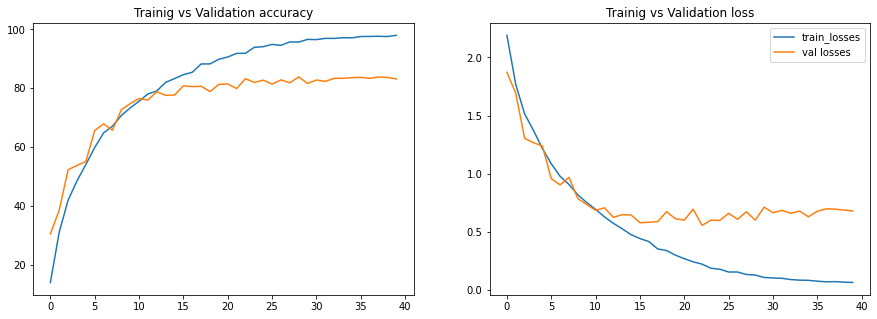

In [48]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.plot(new_train_acc, label = 'train_acc')
plt.plot(test_acc, label = 'val_acc')
plt.title('Trainig vs Validation accuracy')

plt.subplot(1,2,2)
plt.plot(train_losses, label = 'train_losses')
plt.plot(test_losses, label = 'val losses')
plt.title('Trainig vs Validation loss')

plt.legend(loc = 'best')
plt.show()


##### SAving the model

In [49]:
filename = 'finalized_model_40.sav'
pickle.dump(my_model, open(filename, 'wb'))
loaded_model = pickle.load(open(filename, 'rb'))

##### Generating the cam for the predicted class

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

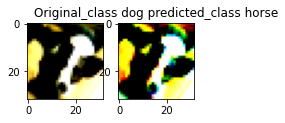

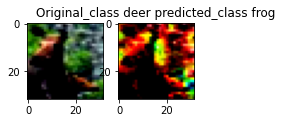

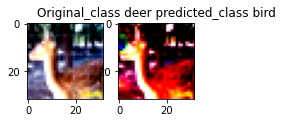

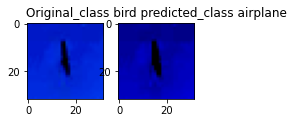

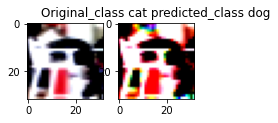

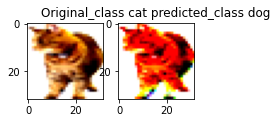

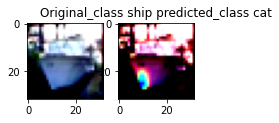

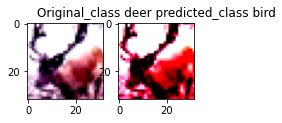

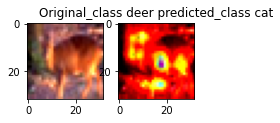

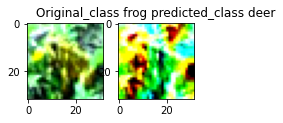

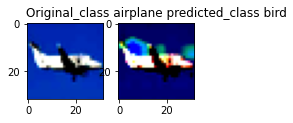

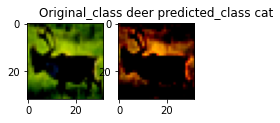

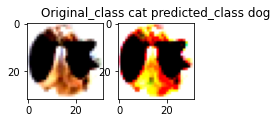

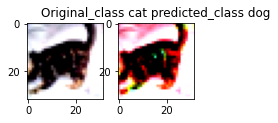

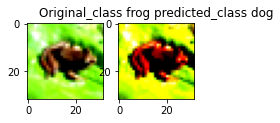

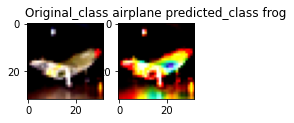

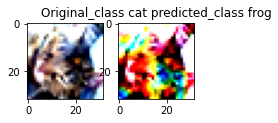

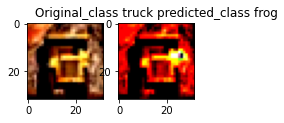

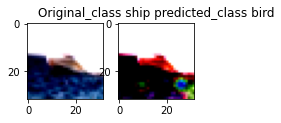

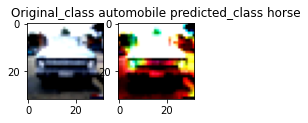

In [50]:
activated_mod = ResNet_Mod(loaded_model)
get_true_pred(testloader,activated_mod,20,class_dictionary)